In [ ]:
import pandas as pd # Assuming you'll use Pandas for data manipulation
import os # For handling file paths

data_folder = "sample_data"
file_name = "age_prediction.csv" # Replace with the actual file name
file_path = os.path.join(data_folder, file_name)


df = pd.read_csv(file_path) # Assuming it's a CSV file

print("First 5 records:", df.head())

First 5 records:       ID Age_group  Age  Gender  PAQ605  Body Mass Index  \
0  73564     Adult   61       2       2             35.7   
1  73568     Adult   26       2       2             20.3   
2  73576     Adult   16       1       2             23.2   
3  73577     Adult   32       1       2             28.9   
4  73580     Adult   38       2       1             35.9   

   Blood Glucose after fasting  Diabetic or not  Respondent's Oral  \
0                          110                2                150   
1                           89                2                 80   
2                           89                2                 68   
3                          104                2                 84   
4                          103                2                 81   

   Blood Insulin Levels  
0                 14.91  
1                  3.85  
2                  6.14  
3                 16.15  
4                 10.92  


In [ ]:
percent_missing = round (100*( df . isnull ().sum ())/len( df ),2)
percent_missing


NameError: name 'df' is not defined

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if necessary)
penguins = df.dropna()


ID                             0
Age_group                      0
Age                            0
Gender                         0
PAQ605                         0
Body Mass Index                0
Blood Glucose after fasting    0
Diabetic or not                0
Respondent's Oral              0
Blood Insulin Levels           0
dtype: int64


In [ ]:
# prompt: pull .data and .column from df  which data from df = pd.read_csv(file_path)
import pandas as pd
df_pandas = pd.DataFrame(df)
data = df_pandas.values
column = df_pandas.columns
my_df = pd.DataFrame(data=data, columns=column)

my_df

,ID,Age_group,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
0,73564,Adult,61,2,2,35.7,110,2,150,14.91
1,73568,Adult,26,2,2,20.3,89,2,80,3.85
2,73576,Adult,16,1,2,23.2,89,2,68,6.14
3,73577,Adult,32,1,2,28.9,104,2,84,16.15
4,73580,Adult,38,2,1,35.9,103,2,81,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711,Adult,38,2,2,33.5,100,2,73,6.53
2274,83712,Adult,61,1,2,30.0,93,2,208,13.02
2275,83713,Adult,34,1,2,23.7,103,2,124,21.41
2276,83718,Adult,60,2,2,27.4,90,2,108,4.99


In [ ]:
cleaned_data = my_df.drop (['Age_group'], axis =1)
cleaned_data . info ()

# columns_to_drop = [col for col in my_df.columns if col == 'Age_group']
# cleaned_data = my_df.drop(columns=columns_to_drop, axis=1)
# cleaned_data . info ()

cleaned_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           2278 non-null   object
 1   Age                          2278 non-null   object
 2   Gender                       2278 non-null   object
 3   PAQ605                       2278 non-null   object
 4   Body Mass Index              2278 non-null   object
 5   Blood Glucose after fasting  2278 non-null   object
 6   Diabetic or not              2278 non-null   object
 7   Respondent's Oral            2278 non-null   object
 8   Blood Insulin Levels         2278 non-null   object
dtypes: object(9)
memory usage: 160.3+ KB


,ID,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
0,73564,61,2,2,35.7,110,2,150,14.91
1,73568,26,2,2,20.3,89,2,80,3.85
2,73576,16,1,2,23.2,89,2,68,6.14
3,73577,32,1,2,28.9,104,2,84,16.15
4,73580,38,2,1,35.9,103,2,81,10.92
...,...,...,...,...,...,...,...,...,...
2273,83711,38,2,2,33.5,100,2,73,6.53
2274,83712,61,1,2,30.0,93,2,208,13.02
2275,83713,34,1,2,23.7,103,2,124,21.41
2276,83718,60,2,2,27.4,90,2,108,4.99


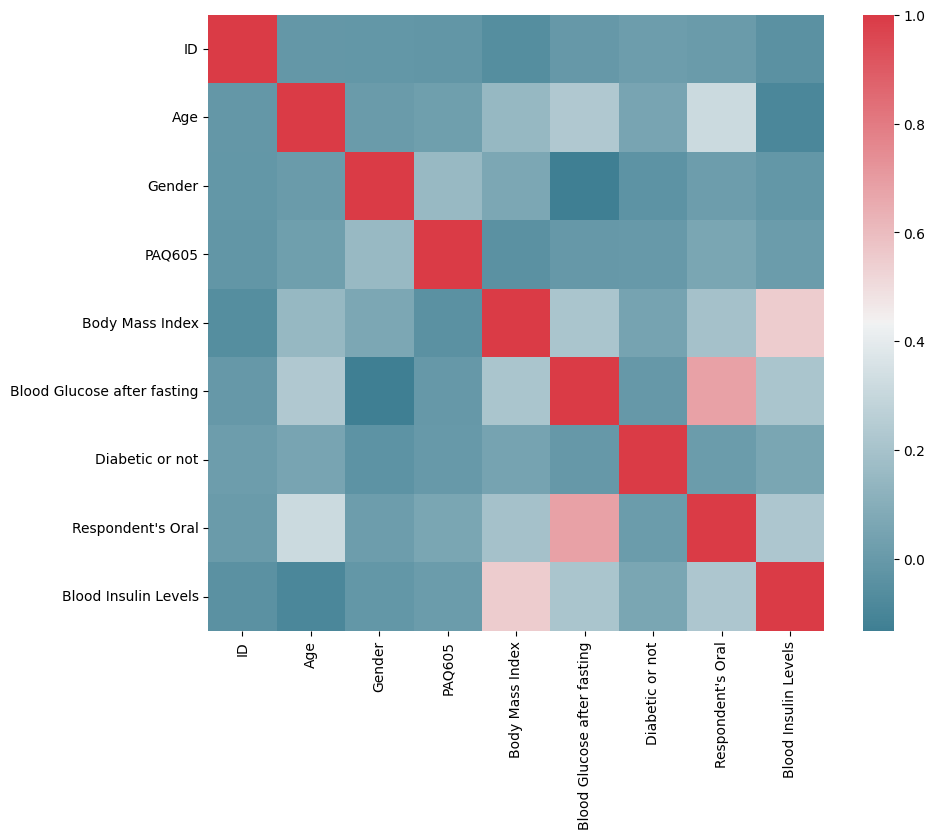

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the dataset into a pandas DataFrame

# Compute the correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = cleaned_data.corr(method="pearson")  # Calculate correlations between features

# Plot the heatmap
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()


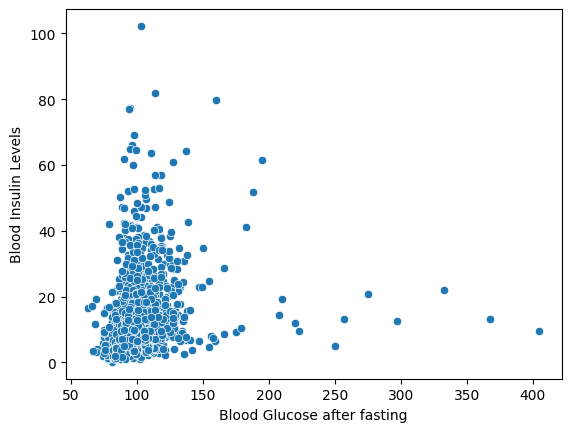

In [ ]:
# 3. ตรวจสอบ Outliers ที่อาจมีผลต่อค่า Correlation
#  ถ้ากระจายเป็นเส้นตรง → Pearson น่าจะถูกต้อง (0.78)
#  ถ้าเป็นแนวโค้ง หรือกระจายแบบไม่มีรูปแบบ → Spearman น่าจะถูกต้องกว่า (0.21)
sns.scatterplot(x=df["Blood Glucose after fasting"], y=df["Blood Insulin Levels"])
plt.show()

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Select relevant numerical features for clustering
features = ["Age", "Body Mass Index", "Respondent's Oral", "Blood Insulin Levels","Blood Glucose after fasting"]
X = cleaned_data[features]

# Standardize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


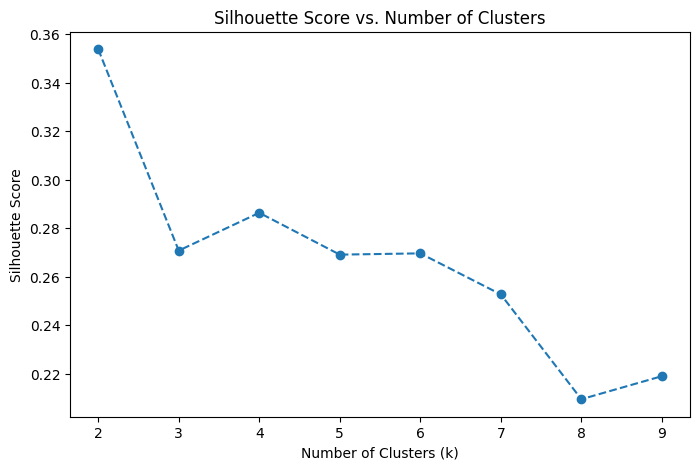

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

k_values = range(2, 10)
silhouette_scores = []

# Compute Silhouette Score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='dashed')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()


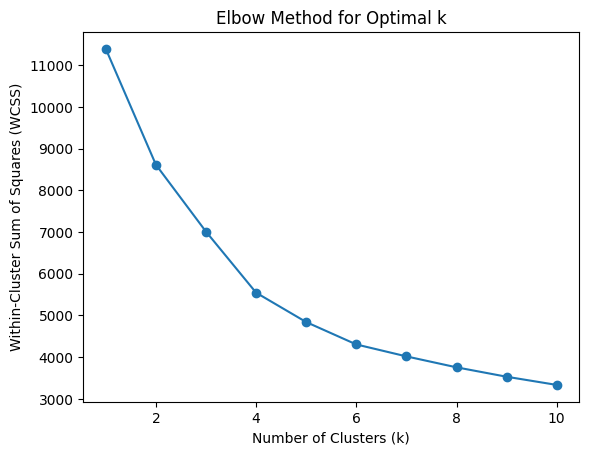

In [ ]:
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Set K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cleaned_data['Cluster'] = kmeans.fit_predict(X_scaled)  # Assign clusters to the data

# View first few rows with cluster assignments
# print(cleaned_data.head())
centroids = kmeans.cluster_centers_
print("Cluster Centroids (Scaled):", centroids)

print(cleaned_data['Cluster'].value_counts())

print(cleaned_data.groupby('Cluster').mean())



Cluster Centroids (Scaled): [[ 0.94237247 -0.01872257  0.28790067 -0.25639247  0.15940436]
 [-0.76032796 -0.47043132 -0.44483165 -0.31219881 -0.35242012]
 [-0.14872857  1.61683139  0.66104637  1.76577531  0.71876079]]
Cluster
1    1059
0     901
2     318
Name: count, dtype: int64
                   ID        Age    Gender    PAQ605 Body Mass Index  \
Cluster                                                                
0        78716.550499   60.81909  1.498335  1.827969       27.817647   
1        78747.556185  26.510859  1.508971   1.82153       24.553541   
2        78436.380503  38.798742  1.556604  1.811321       39.672956   

        Blood Glucose after fasting Diabetic or not Respondent's Oral  \
Cluster                                                                 
0                        102.403996        2.023307         128.63263   
1                         93.267233         2.00661         94.022663   
2                        112.408805        2.028302        146.08

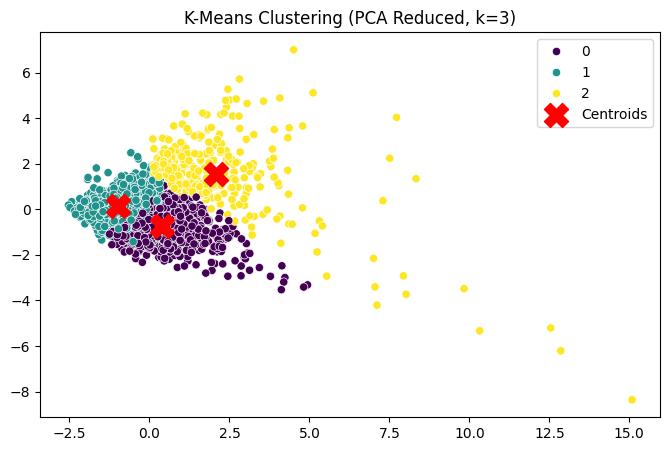

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# If data has only 2 numerical features
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cleaned_data['Cluster'], palette='viridis')
# plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
# plt.title("K-Means Clustering (k=3)")
# plt.legend()
# plt.show()
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cleaned_data['Cluster'], palette='viridis')
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering (PCA Reduced, k=3)")
plt.legend()
plt.show()

# 4. Interpret the Clusters
# Look at cluster size, means, and characteristics.
# Check if cluster labels make sense (e.g., High, Medium, Low groups).
# Use the cluster labels for business decisions, anomaly detection, or feature engineering.

In [ ]:
import numpy as np
import matplotlib . pyplot as plt
import seaborn as sns
from scipy . cluster . hierarchy import dendrogram , linkage , fcluster

# Generate random data for demonstration
# np. random . seed (123 )
# data = np. random . rand (10 , 2)
# linked = linkage (data , 'single ')

In [ ]:
features = ["Age", "Body Mass Index", "Respondent's Oral", "Blood Insulin Levels","Blood Glucose after fasting"]
X = cleaned_data[features]

# Perform hierarchical clustering
linked = linkage(X, 'complete')

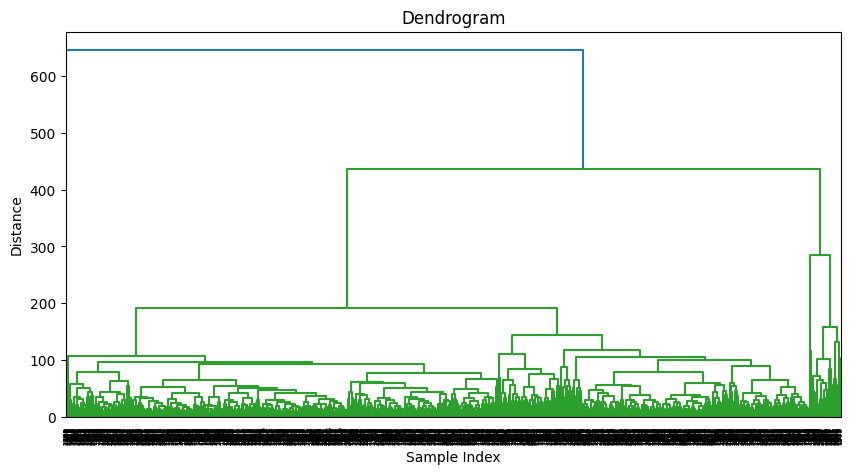

In [ ]:
num_rows = len(cleaned_data)  # Get the actual number of rows

plt . figure ( figsize =(10 , 5))
dendrogram (linked ,orientation ='top',labels = range (1, num_rows+1))
plt.title ('Dendrogram')
plt.xlabel ('Sample Index')
plt.ylabel ('Distance')
plt.show ()